# Attachment Tutorial

This document will briefly describe how to attach molecules to each other.

Molecules that are capable of 'bonding' have defined interfaces which can be viewed when the molecules are drawn with the `faces` option turned on.

In [3]:
%matplotlib inline
import kappa

amber = kappa.Amber()

cnt = kappa.build(amber, "cnt")

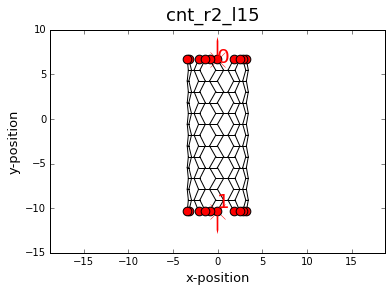

In [4]:
kappa.plot.bonds(cnt, faces=True)

Interfaces are composed of the atoms in the interface and a normal vector in red.

Other molecules have intefaces too:

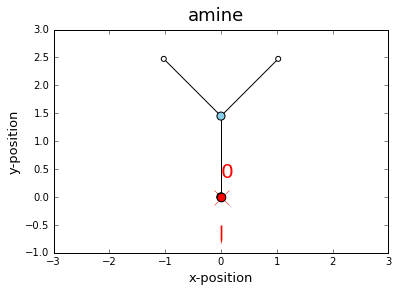

In [6]:
amine = kappa.build(amber, "amine")

kappa.plot.bonds(amine, sites=True, faces=True)

Without looking under the hood, one way to attach these molecules together is to use a `kappa.Calculation`.  As the uninspired name suggests, it is used to actually calculate the thermal conductivity through the interfaces.  We only care about preparing the functionalized molecules.

First we need to find the locations on the CNT where we want to attach our molecules.  These are atomic indices.  We do this by plotting the interfaces in space with the indices shown.

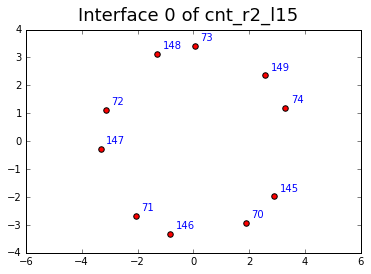

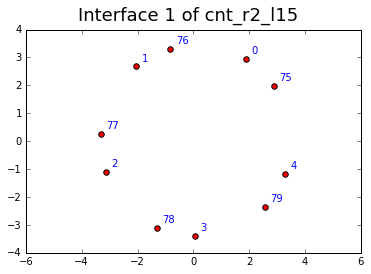

In [7]:
kappa.plot.faces(cnt)

These are the ends of the tube.  Let's say we'll functionalize each end once, so we need to pick 1 index from each interface.  We will do this arbitrarily.

We will instantiate a Calculation object with the CNT base molecule.  We will then combine molecules my passing a list of indices with list of molecules to attach [to the base].  By default energy minimization will occur, but with the default forcefield it should only take moments.  The behavior of this is subject to change.

energy:   635.064068978
maxforce: 412.904705492
###########
 Finished! 
###########
step:     50
energy:   8.97633344508e-07
maxforce: 0.00813470507944
energy:   341.624379429
maxforce: 540.116443742
###########
 Finished! 
###########
step:     32
energy:   2.53715977058e-06
maxforce: 0.00874850169934


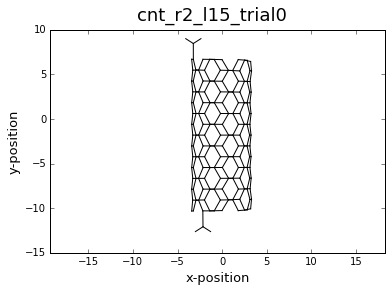

In [8]:
indices = [1, 72]

#Calculations take the base molecule as an argument ie CNTs
mols = kappa.Calculation(cnt)

#Calculation.add to put trial functions in Calculation.trialList
mol1 = mols.add([amine, amine], indices)

kappa.plot.bonds(mol1)

We can also access the molecules of the `Calculation` object using `Calculation.trialList`, the index of which is in the order in which we added attachments via the `add` method.

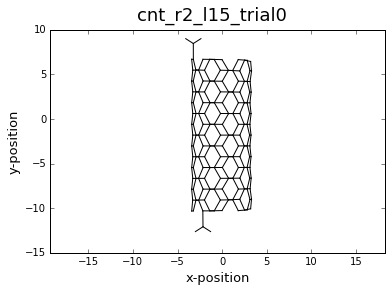

In [9]:
kappa.plot.bonds(mols.trialList[0])

In [ ]:
We can do this with the library of molecule